In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/Employee-Attrition - Employee-Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
df.duplicated().sum()

np.int64(0)

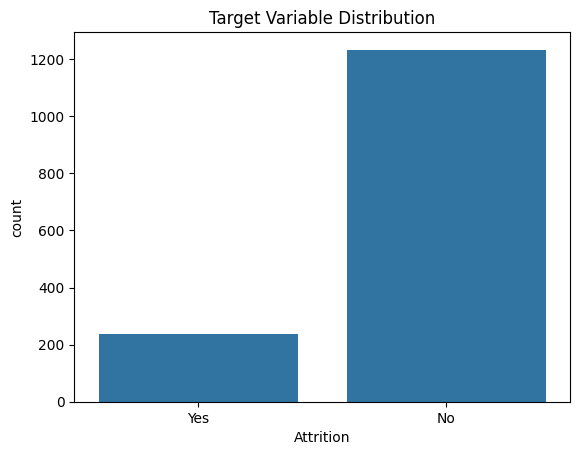

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of target classes
sns.countplot(x='Attrition', data=df)
plt.title("Target Variable Distribution")
plt.show()

In [14]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")



Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director            

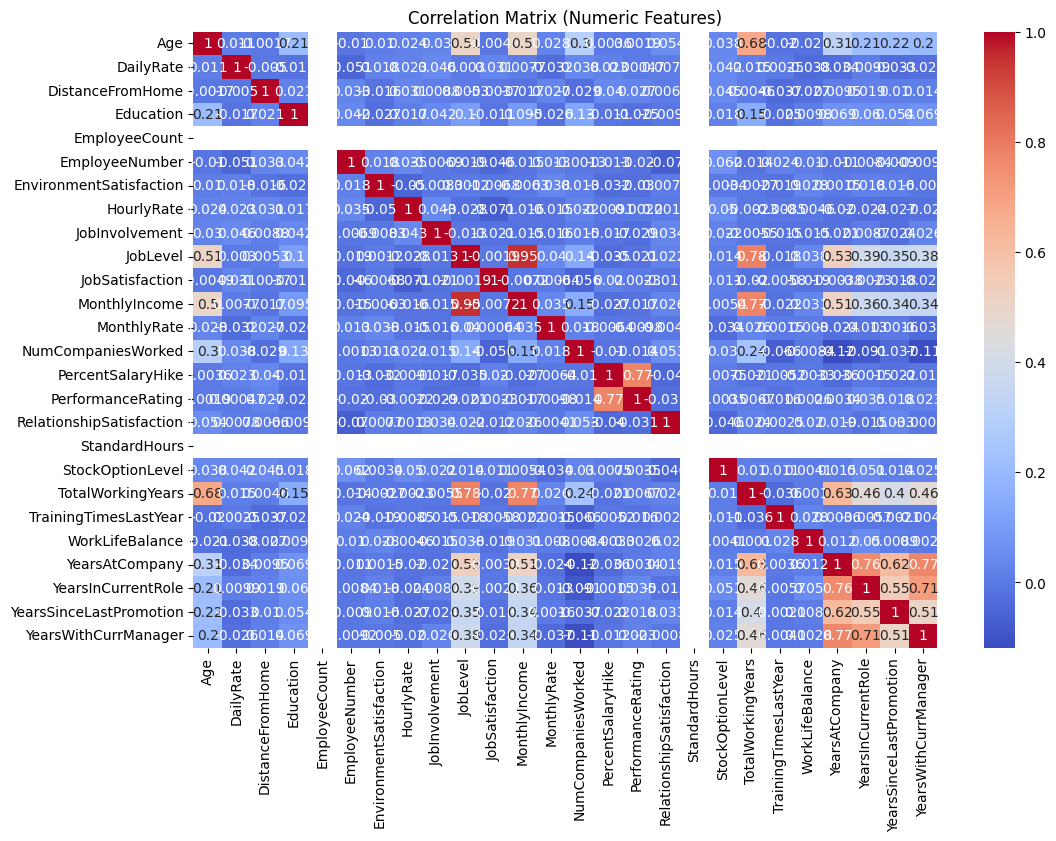

In [16]:
# Correlation heatmap
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


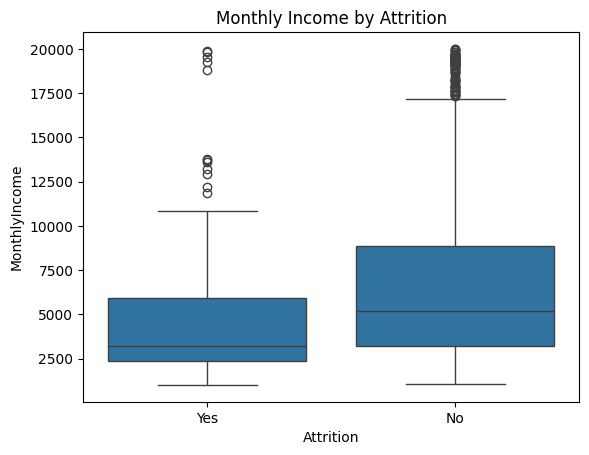

In [20]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

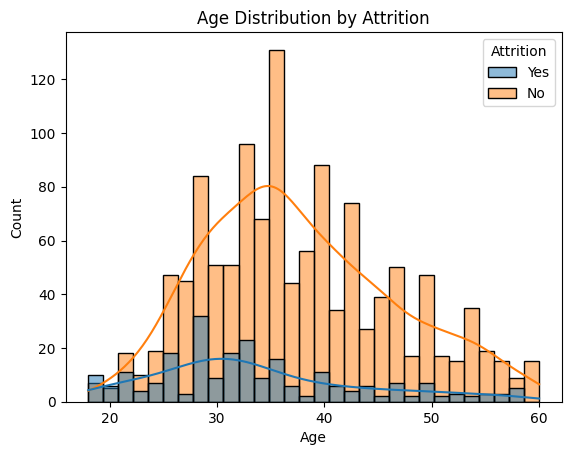

In [19]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=30)
plt.title("Age Distribution by Attrition")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [22]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [23]:
# Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)

feature separation

In [ ]:
# Separate features and target
X = df.drop('Attrition_Yes', axis=1) 
y = df['Attrition_Yes']

In [87]:
expected_cols = X_train.columns.tolist()
pickle.dump(expected_cols, open("columns.pkl", "wb"))

scaling

In [88]:
# Train-test split (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sampling

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


Logestic regression

In [90]:
model = LogisticRegression(random_state=42)
model.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=42)

In [91]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7732426303854876

Confusion Matrix:
 [[298  72]
 [ 28  43]]

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.81      0.86       370
        True       0.37      0.61      0.46        71

    accuracy                           0.77       441
   macro avg       0.64      0.71      0.66       441
weighted avg       0.83      0.77      0.79       441



Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)


RandomForestClassifier(random_state=42)

In [95]:
y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8412698412698413

Confusion Matrix:
 [[353  17]
 [ 53  18]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.95      0.91       370
        True       0.51      0.25      0.34        71

    accuracy                           0.84       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.81      0.84      0.82       441



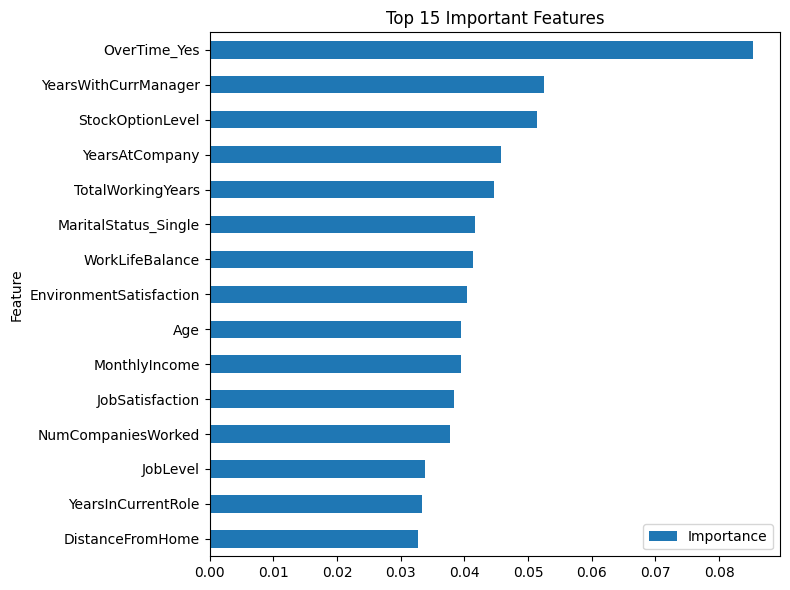

In [96]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(15).plot(
    x='Feature', y='Importance', kind='barh', figsize=(8, 6), title='Top 15 Important Features'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [98]:
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [None, 10, 20],         # Depth of trees
    'min_samples_split': [2, 5],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2],          # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']     # Features considered at each split
}


Tuning the hyperparameter

In [99]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',   # You can also use 'accuracy' or 'roc_auc'
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-balanced training data
grid_search.fit(X_train_sm, y_train_sm)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [100]:
print("Best Parameters:\n", grid_search.best_params_)
print("\nBest Score (F1):", grid_search.best_score_)

Best Parameters:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Score (F1): 0.931275961495361


In [102]:
best_rf = grid_search.best_estimator_

# Predict on original (imbalanced) test data
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8412698412698413

Confusion Matrix:
 [[353  17]
 [ 53  18]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.95      0.91       370
        True       0.51      0.25      0.34        71

    accuracy                           0.84       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.81      0.84      0.82       441



In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_sm, y_train_sm)

best_rf = grid_rf.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


Boosting the model

In [104]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_sm, y_train_sm)

best_xgb = grid_xgb.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\DELL\.conda\envs\pytho_3_10\lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


Random Forest Accuracy: 0.8412698412698413
Random Forest Report:
               precision    recall  f1-score   support

       False       0.87      0.95      0.91       370
        True       0.51      0.25      0.34        71

    accuracy                           0.84       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.81      0.84      0.82       441

XGBoost Accuracy: 0.8480725623582767
XGBoost Report:
               precision    recall  f1-score   support

       False       0.88      0.95      0.91       370
        True       0.55      0.32      0.41        71

    accuracy                           0.85       441
   macro avg       0.71      0.64      0.66       441
weighted avg       0.83      0.85      0.83       441



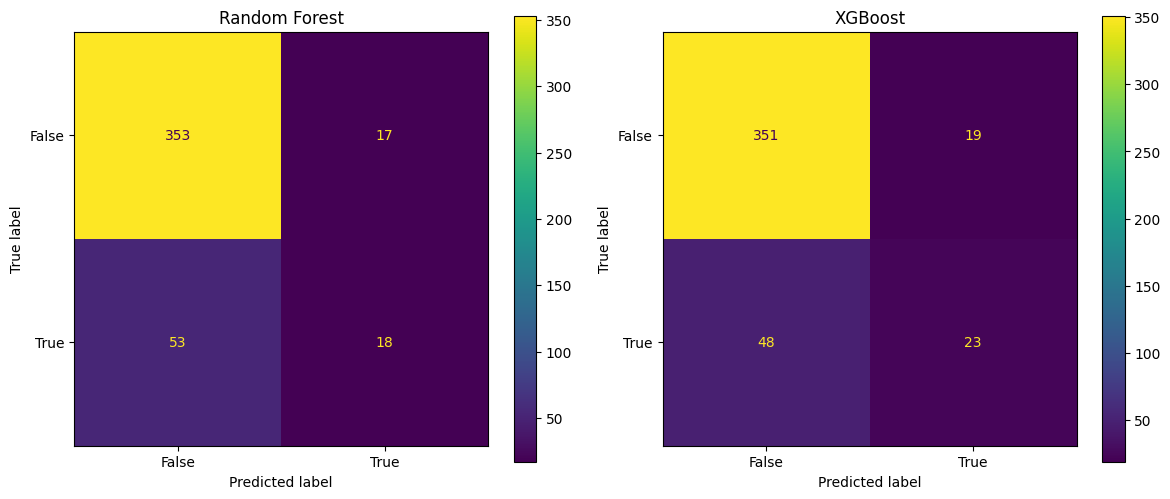

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[0])
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[1])
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


pickling

In [107]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(best_rf, f)  # or best_xgb

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)  # StandardScaler used for features


Deploy in streamlit

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle

# Load model, scaler, and expected columns
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
expected_cols = pickle.load(open("columns.pkl", "rb"))

st.set_page_config(page_title="EMPLOYEE ATTRITION PREDICTION", layout="wide") 
st.sidebar.title("📌 Navigation")

page = st.sidebar.radio("Go to", ["Project Introduction", "Employee Attrition Prediction", "Creator Info"])

# --------------------- Introduction Page ---------------------
if page == "Project Introduction":
    st.title("🔍 Employee Attrition Predictor")
    st.subheader("A Streamlit App for Exploring Attrition Trends")

    st.markdown("""
        <div style='color: #2E8B57;'> 
        This project aims to analyze employee data, identify key drivers of attrition, 
        and build predictive models to support proactive decision-making in workforce management.
        </div>
    """, unsafe_allow_html=True)

    st.markdown("""
    ### 🎯 Purpose of this Model:
    - Identify at-risk employees and implement targeted strategies to reduce turnover.  
    - Minimize recruitment, onboarding, and training costs associated with high attrition rates.  
    - Use predictive insights to align retention strategies with organizational goals and improve employee satisfaction.  
    """)

# --------------------- Prediction Page ---------------------
elif page == "Employee Attrition Prediction":
    st.title("🧮 Employee Attrition Prediction")
    st.write("Enter employee details below to check the likelihood of attrition.")

    # Inputs
    age = st.slider("Age", 18, 60, 30)
    distance = st.slider("Distance From Home", 1, 30, 5)
    monthly_income = st.number_input("Monthly Income", 1000, 40000, 5000)
    total_working_years = st.slider("Total Working Years", 0, 40, 10)
    years_at_company = st.slider("Years at Company", 0, 40, 5)
    years_in_current_role = st.slider("Years in Current Role", 0, 20, 3)

    job_role = st.selectbox("Job Role", [
        "Sales Executive", "Research Scientist", "Laboratory Technician",
        "Manufacturing Director", "Healthcare Representative",
        "Manager", "Sales Representative", "Research Director", "Human Resources"
    ])
    overtime = st.selectbox("OverTime", ["Yes", "No"])
    
    st.write("Expected columns:", expected_cols)
        # Build input dictionary
    input_dict = {col: 0 for col in expected_cols}

    # Only assign values that exist in expected_cols
    if "Age" in expected_cols:
        input_dict["Age"] = age
    if "DistanceFromHome" in expected_cols:
        input_dict["DistanceFromHome"] = distance
    if "MonthlyIncome" in expected_cols:
        input_dict["MonthlyIncome"] = monthly_income
    if "TotalWorkingYears" in expected_cols:
        input_dict["TotalWorkingYears"] = total_working_years
    if "YearsAtCompany" in expected_cols:
        input_dict["YearsAtCompany"] = years_at_company
    if "YearsInCurrentRole" in expected_cols:
        input_dict["YearsInCurrentRole"] = years_in_current_role
    if "OverTime_Yes" in expected_cols:
        input_dict["OverTime_Yes"] = 1 if overtime == "Yes" else 0
    jobrole_col = f"JobRole_{job_role}"
    if jobrole_col in expected_cols:
        input_dict[jobrole_col] = 1

    input_df = pd.DataFrame([input_dict])[expected_cols]
    input_scaled = scaler.transform(input_df)



    # Prediction
    if st.button("🔎 Predict Attrition"):
        prediction = model.predict(input_scaled)[0]
        probability = model.predict_proba(input_scaled)[0][1]

        if prediction == 1:
            st.error(f"⚠️ High Risk of Attrition! (Probability: {probability:.2%})")
        else:
            st.success(f"✅ Low Risk of Attrition (Probability: {probability:.2%})")

# --------------------- Creator Page ---------------------
elif page == "Creator Info":
    st.title("👩‍💻 Creator of this Project")
    st.markdown("""
    **Developed by:** AGILA.R  
    **Skills Used:**  
    - Python 🐍  
    - Pandas 🐼  
    - EDA 📊  
    - Machine Learning 🤖  
    - Streamlit 🚀  
    """)


Overwriting app.py


In [109]:
!streamlit run app.py

^C


Prediction and loaded as csv file

In [71]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load saved files
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
expected_cols = pickle.load(open("columns.pkl", "rb"))

st.title("📁 Employee Attrition Prediction (Batch)")

# Upload CSV file
uploaded_file = st.file_uploader("Upload a CSV file with employee data", type=["csv"])

if uploaded_file is not None:
    # Read the uploaded file
    input_df = pd.read_csv(uploaded_file)
    st.write("✅ Uploaded Data Preview:")
    st.dataframe(input_df.head())

    # One-hot encode categorical columns to match training
    input_encoded = pd.get_dummies(input_df)

    # Add missing columns (in case file has fewer dummy columns than expected)
    for col in expected_cols:
        if col not in input_encoded:
            input_encoded[col] = 0

    # Ensure the column order matches the training data
    input_encoded = input_encoded[expected_cols]

    # Scale the input
    input_scaled = scaler.transform(input_encoded)

    # Predict
    predictions = model.predict(input_scaled)
    probabilities = model.predict_proba(input_scaled)[:, 1]  # probability of class '1' (not working)

    # Append results to original DataFrame
    input_df["Prediction"] = np.where(predictions == 1, "Not Working", "Currently Working")
    input_df["Attrition_Probability"] = probabilities

    # Show results
    st.write("📊 Prediction Results:")
    st.dataframe(input_df)

    # Option to download results
    csv_download = input_df.to_csv(index=False).encode("utf-8")
    st.download_button("📥 Download Prediction Results as CSV", csv_download, "attrition_predictions.csv", "text/csv")


Overwriting app.py


In [72]:
!streamlit run app.py

^C
